### Implementation of Classification Model

In this notebook we go implement different models to classification to determine whether mushrooms are edible, it is necessary to collect mushrooms with different characteristic attributes and analyze whether they are toxic in the mushroom dataset.

Like we saw in the analysis notebook, it is suggested to implement complex models, therefore we are gone to implement random forest, gradient boost and neuronal networks and analyzing which is better to solve this problem.

#### Import and Adjust Data

In [1]:
# Libraries to use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Importing the dataset
mushroom_dataset = pd.read_csv('../assets/data/mushroom.csv')
mushroom_dataset = mushroom_dataset.drop(columns=['stalk-root'])
mushroom_dataset.head()

,class,cap-shape,cap-surface,cap-color,ruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,f,n,f,n,f,w,n,b,...,y,w,p,NaN,n,o,p,w,v,NaN
1,p,NaN,y,g,t,NaN,f,c,b,k,...,s,n,c,p,w,n,e,NaN,y,g
2,e,b,y,n,t,n,f,c,NaN,n,...,s,p,NaN,p,w,o,p,b,y,w
3,e,x,g,g,t,n,f,w,b,n,...,s,p,NaN,p,w,n,n,NaN,NaN,d
4,e,NaN,f,NaN,t,n,a,w,n,n,...,k,NaN,w,p,w,NaN,l,w,v,d


In [7]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

mushroom_dataset = pd.DataFrame(imputer.fit_transform(mushroom_dataset), columns=mushroom_dataset.columns)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

mushroom_dataset_encoded = mushroom_dataset.apply(label_encoder.fit_transform)


X = mushroom_dataset_encoded.drop(columns=['class'])
y = mushroom_dataset_encoded['class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

**Note**: As we saw in the frequency analysis in the 'Stalk-root' have many values of ?, therefore, we will not tend this column to implement the models. 


#### Random Forest Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

classifier_RF = RandomForestClassifier(n_estimators=100, random_state=0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
y_pred_RF = classifier_RF.predict(X_test)

Accuracy of Random Forest Classifier:  0.7262698819907645


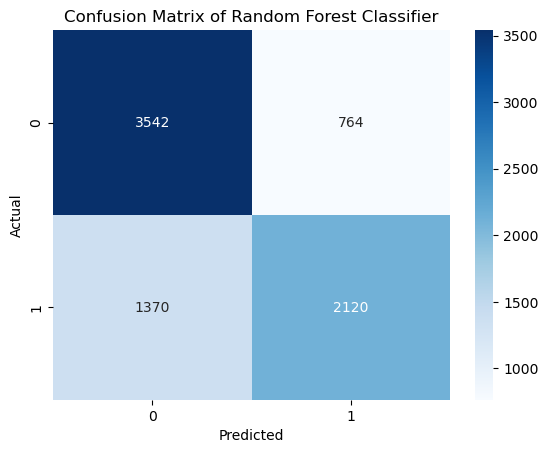

Classification Report of Random Forest Classifier: 
               precision    recall  f1-score   support

      Edible       0.72      0.82      0.77      4306
   Poisonous       0.74      0.61      0.67      3490

    accuracy                           0.73      7796
   macro avg       0.73      0.72      0.72      7796
weighted avg       0.73      0.73      0.72      7796



In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_RF = accuracy_score(y_test, y_pred_RF)
print('Accuracy of Random Forest Classifier: ', accuracy_RF)

confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(confusion_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

classification_report_RF = classification_report(y_test, y_pred_RF, target_names=['Edible', 'Poisonous'])
print('Classification Report of Random Forest Classifier: \n', classification_report_RF)

In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search_RF = GridSearchCV(estimator=classifier_RF, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search_RF.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search_RF.best_params_}')

# Best estimator
best_rf_model = grid_search_RF.best_estimator_


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
407 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nicla\miniconda3\envs\mushroom-classification-enhanced\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\nicla\miniconda3\envs\mushroom-classification-en

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


Tuned Model Accuracy: 0.74


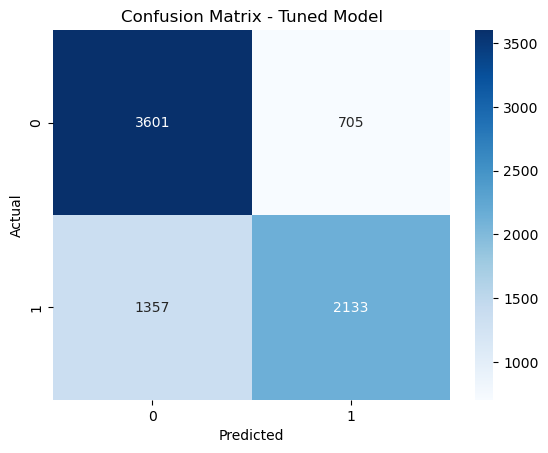

Classification Report - Tuned Model:
              precision    recall  f1-score   support

      edible       0.73      0.84      0.78      4306
   poisonous       0.75      0.61      0.67      3490

    accuracy                           0.74      7796
   macro avg       0.74      0.72      0.73      7796
weighted avg       0.74      0.74      0.73      7796



In [15]:
# Make predictions with the best model
best_y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
best_accuracy = accuracy_score(y_test, best_y_pred)
print(f'Tuned Model Accuracy: {best_accuracy:.2f}')

# Generate a confusion matrix
best_conf_matrix = confusion_matrix(y_test, best_y_pred)
sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
best_class_report = classification_report(y_test, best_y_pred, target_names=['edible', 'poisonous'])
print('Classification Report - Tuned Model:')
print(best_class_report)
